In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from tensorflow import keras
from keras.datasets import boston_housing
import pandas as pd

In [0]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [12]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [11]:
df = pd.DataFrame(X_train)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
0     404 non-null float64
1     404 non-null float64
2     404 non-null float64
3     404 non-null float64
4     404 non-null float64
5     404 non-null float64
6     404 non-null float64
7     404 non-null float64
8     404 non-null float64
9     404 non-null float64
10    404 non-null float64
11    404 non-null float64
12    404 non-null float64
dtypes: float64(13)
memory usage: 41.2 KB


In [0]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [62]:
X_test.shape

(102, 13)

In [16]:
pd.DataFrame(X_train).head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497


In [0]:
def build_model():
  model = keras.Sequential([
                            keras.layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
                            keras.layers.Dense(64, activation="relu"),
                            keras.layers.Dense(1)
  ])
  model.compile(loss="mse", optimizer="rmsprop", metrics=["mae"])
  return model

In [26]:
import numpy as np

k = 4
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print(f"processing fold #: {i}")
  val_data = X_train[i * num_val_samples : (i + 1) * num_val_samples]
  val_targets = y_train[i * num_val_samples : (i + 1) * num_val_samples]
  
  partial_train_data = np.r_[X_train[:i * num_val_samples], X_train[(i+1) * num_val_samples:]]
  partial_train_targets = np.r_[y_train[:i * num_val_samples], y_train[(i+1) * num_val_samples:]]

  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold #: 0
processing fold #: 1
processing fold #: 2
processing fold #: 3


In [28]:
all_scores

[2.5167599, 2.3792424, 3.0474086, 2.500281]

In [29]:
np.mean(all_scores)

2.610923

In [32]:
num_epochs = 200
all_mae_histories = []

for i in range(k):
  print(f"processing fold #: {i}")
  val_data = X_train[i * num_val_samples : (i+1) * num_val_samples]
  val_targets = y_train[i * num_val_samples : (i+1) * num_val_samples]

  partial_train_data = np.r_[X_train[:i * num_val_samples], X_train[(i+1) * num_val_samples:]]
  partial_train_targets = np.r_[y_train[:i * num_val_samples], y_train[(i+1) * num_val_samples:]]

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, 
                      epochs=num_epochs, batch_size=1, verbose=0,
                      validation_data=(val_data, val_targets))
  all_mae_histories.append(history.history["val_mae"])  

processing fold #: 0
processing fold #: 1
processing fold #: 2
processing fold #: 3


In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

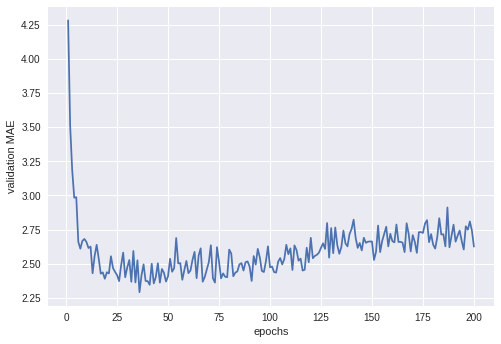

In [38]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("epochs")
plt.ylabel("validation MAE")
plt.show()

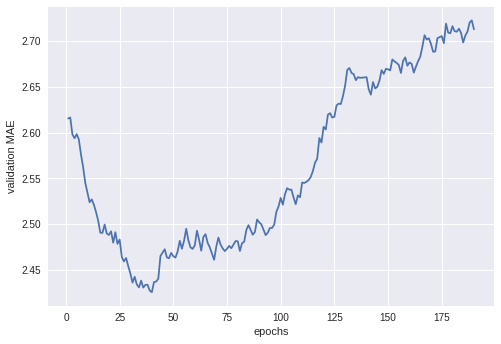

In [51]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel("epochs")
plt.ylabel("validation MAE")
plt.show()

In [53]:
model = build_model()
model.fit(X_train, y_train, epochs=80, batch_size=1)

Train on 404 samples
Epoch 1/80
404/404 [==============================] - 1s 2ms/sample - loss: 180.6126 - mae: 10.0077
Epoch 2/80
404/404 [==============================] - 1s 1ms/sample - loss: 26.9822 - mae: 3.4281
Epoch 3/80
404/404 [==============================] - 1s 1ms/sample - loss: 19.9824 - mae: 2.8740
Epoch 4/80
404/404 [==============================] - 1s 1ms/sample - loss: 16.9973 - mae: 2.7049
Epoch 5/80
404/404 [==============================] - 1s 1ms/sample - loss: 15.1362 - mae: 2.5638
Epoch 6/80
404/404 [==============================] - 1s 1ms/sample - loss: 13.7405 - mae: 2.4325
Epoch 7/80
404/404 [==============================] - 1s 1ms/sample - loss: 13.0427 - mae: 2.3650
Epoch 8/80
404/404 [==============================] - 1s 1ms/sample - loss: 12.0325 - mae: 2.2991
Epoch 9/80
404/404 [==============================] - 1s 1ms/sample - loss: 11.4623 - mae: 2.2572
Epoch 10/80
404/404 [==============================] - 1s 1ms/sample - loss: 10.4641 - mae: 2.1

In [63]:
model.evaluate(X_test, y_test)

102/102 [==============================] - 0s 710us/sample - loss: 15.0141 - mae: 2.4416


[15.014126048368567, 2.4416292]

(404, 13)